Exploratory Data Analysis

In [1]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
#import dependencies
import pandas as pd 

#Read in CSV 
sample_df = pd.read_csv("Resources/SampleData.csv")
sample_df.head()

,Target,Text
0,neutral,Won the match #getin . Plus\u002c tomorrow is ...
1,neutral,Some areas of New England could see the first ...
2,negative,@francesco_con40 2nd worst QB. DEFINITELY Tony...
3,neutral,#Thailand Washington - US President Barack Oba...
4,neutral,Did y\u2019all hear what Tony Romo dressed up ...


In [3]:
#Columns/features in data
sample_df.columns

Index(['Target', 'Text'], dtype='object')

In [4]:
#Length of dataset
print('length of data is', len(sample_df))

length of data is 33


In [5]:
#Shape of data
sample_df.shape

(33, 2)

In [6]:
#Data info
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  33 non-null     object
 1   Text    33 non-null     object
dtypes: object(2)
memory usage: 656.0+ bytes


In [7]:
#Datatypes of ll columns 
sample_df.dtypes

Target    object
Text      object
dtype: object

In [8]:
#Checking for NullValues
np.sum(sample_df.isnull().any(axis=1))

0

In [9]:
#Check unique Target Values
sample_df['Target'].nunique()

3

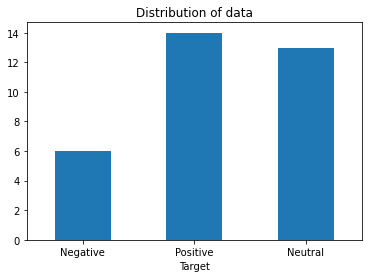

In [10]:
# Plotting the distribution for dataset.
ax = sample_df.groupby('Target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive', 'Neutral'], rotation=0)
# Storing data in lists.
text, sentiment = list(sample_df['Text']), list(sample_df['Target'])

<AxesSubplot:xlabel='Target', ylabel='count'>

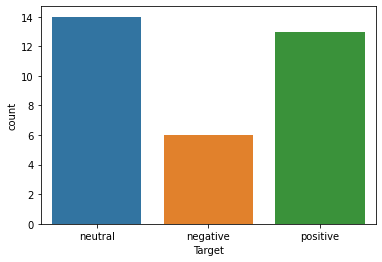

In [15]:
import seaborn as sns
sns.countplot(x='Target', data=sample_df)

Data Preprocessing

In [20]:
# Selecting the text and Target column for our further analysis
data = sample_df[['Target','Text']]

In [24]:
#Assign sentiments numeric values
sample_df['Target'] = sample_df['Target'].map({'positive':2,'neutral':1, 'negative': 0})
sample_df

,Target,Text
0,1,Won the match #getin . Plus\u002c tomorrow is ...
1,1,Some areas of New England could see the first ...
2,0,@francesco_con40 2nd worst QB. DEFINITELY Tony...
3,1,#Thailand Washington - US President Barack Oba...
4,1,Did y\u2019all hear what Tony Romo dressed up ...
5,2,Tim Tebow may be availible ! Wow Jerry \u002c ...
6,2,@mariakaykay aga tayo tomorrow ah. :) Good nig...
7,1,Tina Fey & Amy Poehler are hosting the Golden ...
8,2,Lunch from my new Lil spot ...THE COTTON BOWL ...
9,2,SNC Halloween Pr. Pumped. Let\u2019s work it f...
